# Numpy Experiments

1) adding vectors

2) adding matrix

3) multiplying matrix

In [46]:
import numpy as np
import matplotlib.pyplot as plt


## Data sets

The article  `An Introduction to the Conjugate Gradient Method Without the Agonizing Pain` uses a simple example to demonstrate various points.

The example uses a $2 \times 2$ matrix $\mathbf{A}$, a vector $\mathbf{b}$ and a scalar $c$ to define the function $f(\mathbf{x})$:

$$
\mathbf{A} = \left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array}
\right]
$$

$$
\mathbf{b} = \left[
\begin{array}{c}
2 \\
-8
\end{array}
\right]
$$

$$
c = 0
$$

For our experiments these definitions will be used.

In [47]:
# 2 x 2 matrix
A_mat = np.array([[3.0, 2.0], [2.0, 6.0]])
# row column vector)
b_vec = np.array([2.0, -8])
b3_vec = np.vstack(([2, 2, 2], [-8, -8, -8]))
c_scalar = 0 

In [48]:
# multplying matrix with vector
r_vec = np.dot(A_mat, b_vec)
print(f"r_vec: {r_vec}")

r_vec: [-10. -44.]


In [49]:
b_vec.shape

(2,)

In [50]:
r3_vec = np.dot(A_mat, b3_vec)
r3_vec

array([[-10., -10., -10.],
       [-44., -44., -44.]])

In [51]:
Nx = 200
Ny = 200
x_min = -4.0
x_max = 6.0
y_min = -6
y_max = 4
x_vec = np.linspace(x_min, x_max, Nx)
y_vec = np.linspace(y_min, y_max, Ny)
# making a grid (required for contour plots)
x_grid, y_grid = np.meshgrid(x_vec, y_vec, indexing='xy')

In [52]:
x_grid[0, 0:5]

array([-4.        , -3.94974874, -3.89949749, -3.84924623, -3.79899497])

In [53]:
x_grid[10, 0:5]

array([-4.        , -3.94974874, -3.89949749, -3.84924623, -3.79899497])

In [54]:
y_grid[0, 0:5]

array([-6., -6., -6., -6., -6.])

In [55]:
y_grid[10, 0:5]

array([-5.49748744, -5.49748744, -5.49748744, -5.49748744, -5.49748744])

In [56]:
vv = np.array([x_grid[10, 0:5], y_grid[10, 0:5]])
vv

array([[-4.        , -3.94974874, -3.89949749, -3.84924623, -3.79899497],
       [-5.49748744, -5.49748744, -5.49748744, -5.49748744, -5.49748744]])

## Computing a quadratic form

$$
f(\mathbf{x}) = \frac{1}{2} \cdot \mathbf{x}^T \cdot \mathbf{A} \cdot \mathbf{x} - \mathbf{b}^T \cdot \mathbf{x} + c
$$

In [61]:
# initialise memory for function values
f_vec = np.zeros(x_grid.shape)

# loop over rows
for i_row in range(Ny):
    xv = np.array([x_grid[i_row, :], y_grid[i_row, :]])
    bx = np.dot(b_vec, xv)
    ax = np.dot(A_mat, xv)
    tmp = xv * ax
    res = 0.5 * tmp.sum(axis=0) - bx
    f_vec[i_row, :] = res
    

In [62]:
print(f"xv.shape: {xv.shape}")
print(f"bx.shape: {bx.shape}")
print(f"ax.shape: {ax.shape}")
print(f"tmp.shape: {tmp.shape}")
print(f"res.shape: {res.shape}")
print(f"f_vec.shape: {f_vec.shape}")


xv.shape: (2, 200)
bx.shape: (200,)
ax.shape: (2, 200)
tmp.shape: (2, 200)
res.shape: (200,)
f_vec.shape: (200, 200)


In [64]:
np.max(f_vec)

170.0

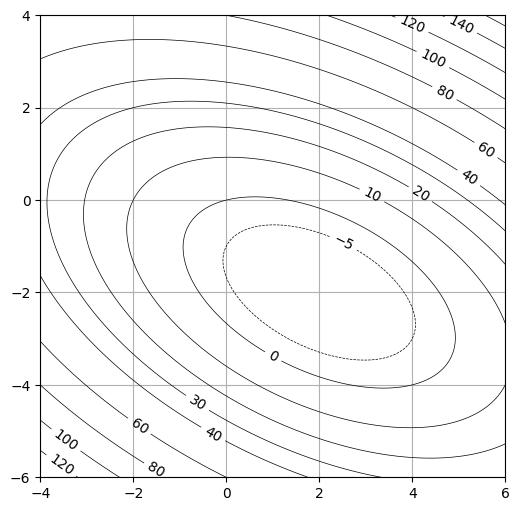

In [74]:
fig1 = plt.figure(1, figsize=[6, 6])
ax_f1 = fig1.add_subplot(1, 1, 1)

CS = ax_f1.contour(x_grid, y_grid, f_vec, linewidths=0.5, colors='black', levels=[-5, 0, 10, 20, 30, 40, 60, 80, 100, 120, 140, 160])
ax_f1.clabel(CS, CS.levels, inline=True, fontsize=10)
ax_f1.grid(True)